In [129]:
####################################################
#--------- Import Library ที่ต้องการจะใช้ -------------#
####################################################

import pandas as pd                         
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [130]:
url_train = 'https://raw.githubusercontent.com/BU-MLearning/Summer/master/test.csv'   # ดึงข้อมูลจาก URL เก็บไว้ในตัวแปร url_train 

data = pd.read_csv(url_train)                      # ใช้ฟังชั่นของ pandas เพื่ออ่านข้อมูลจากตัวแปร url_train หลังจากนั้นเก็บไว้ในตัวแปร data
copy_data = data.copy()                            # Copy ไฟล์อีกทีเพื่อเก็บต้นฉบับไว้

In [143]:
copy_data.head()                                   # แสดงข้อมูล 5 rows เพื่อดูว่าควรจะใช้ Column ไหนบ้าง

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,Sensor_34,Sensor_35,Sensor_36,Sensor_37,Sensor_38,Sensor_39,Sensor_40,...,Sensor_62,Sensor_63,Sensor_64,Sensor_65,Sensor_66,Sensor_67,Sensor_68,Sensor_69,Sensor_70,Sensor_71,Sensor_72,Sensor_73,Sensor_74,Sensor_75,Sensor_76,Sensor_77,Sensor_78,Sensor_79,Sensor_80,Sensor_81,Sensor_82,Sensor_83,Sensor_84,Sensor_85,Sensor_86,Sensor_87,Sensor_88,Sensor_89,Sensor_90,Sensor_91,Sensor_92,Sensor_93,Sensor_94,Sensor_95,Sensor_96,Sensor_97,Sensor_98,Sensor_99,Sensor_100,Label
0,-0.449894,0.646682,0.668765,0.235321,0.153988,-1.392469,-1.224842,0.241905,1.004703,1.175475,1.219584,-0.005505,-0.506466,0.452633,2.151642,1.297232,-0.423208,-1.022358,-2.264455,-0.760577,-0.508492,1.906691,0.342619,-2.337298,-1.283679,-0.176194,-1.184483,-1.367435,-0.138640,-0.950448,-2.516548,0.517890,-0.210775,0.689663,1.310935,-0.474299,-1.174948,-0.980263,0.071778,1.302723,...,-0.722123,-1.425723,0.365211,1.357160,-0.454566,0.186360,-1.505929,-0.531395,-0.351178,1.517882,-0.514990,1.281092,0.445778,-1.031059,-1.953465,-0.590277,1.550251,1.789768,0.188089,-0.492226,-2.056853,-0.590605,2.024650,0.055603,-0.762839,-0.428230,-2.117462,-0.506320,1.609906,0.632004,0.604272,0.114997,0.689170,-1.505299,0.291152,1.046132,-0.123871,-1.221030,-1.227072,abnormal
1,-1.129611,-1.771673,0.158409,-1.754949,0.728674,-0.243776,0.073584,0.280049,-1.936088,-0.955292,-1.729637,1.827654,1.931613,-0.868665,-1.432531,-1.244416,-0.056877,-0.483835,0.931664,-0.096344,-0.047218,-0.979585,-0.245350,-0.620030,0.527351,-1.214024,-1.050382,0.235979,-0.248450,-1.011530,0.451204,0.880085,-0.564023,-1.740466,-0.214883,1.655464,0.935052,1.224123,-1.061815,-2.363940,...,1.578778,1.310756,-2.196860,1.022271,-0.505334,-0.409179,0.810762,2.295949,0.313072,-0.433210,-0.723919,-0.170561,1.926298,0.723332,-1.024347,1.010861,-3.677950,0.989143,0.303259,0.095647,-0.685421,-0.950180,-1.077097,-0.477483,0.081483,0.453253,0.852829,0.367597,-0.490414,-0.497365,-0.649547,0.555835,1.451449,1.133723,0.092543,-1.647650,0.609274,-0.654210,1.750552,abnormal
2,0.639386,-0.373275,0.548142,1.623120,1.407057,0.433396,-0.479315,-2.284366,0.411730,2.620781,0.411265,0.961920,0.007759,-1.369933,-1.151325,1.236936,1.943854,-0.492302,0.314229,-0.084490,-1.206633,-0.846945,1.852635,1.474836,-1.160062,-0.166994,-1.615527,0.716199,-0.064751,-0.707700,-0.203885,0.507975,-0.735556,-0.042767,-0.104198,0.002531,-0.945823,-0.402597,-2.206972,-2.101661,...,1.045177,-0.150865,0.827669,-2.102996,0.312249,0.016899,0.748904,0.708004,-1.128597,0.048946,0.928995,0.130571,-0.268114,-0.750904,1.370650,-1.656745,1.813914,1.699806,0.491198,0.530745,-0.839204,-1.197386,-0.324893,0.823060,0.195945,2.362176,-0.659091,0.136089,-0.782883,-0.602714,0.588757,1.816353,0.699807,-2.213835,-1.163962,-1.492692,0.414745,1.870571,0.976627,abnormal
3,-0.905680,0.136046,-0.020881,-0.656648,-1.721446,-0.275928,1.559402,1.582275,0.360686,-0.950462,-1.995367,-1.533394,-1.274491,0.291125,0.574508,-2.176744,-0.611481,-1.557059,0.256019,2.099021,0.338593,1.120998,-1.007196,-1.087302,0.506210,0.029889,0.917732,0.828529,1.329170,-0.330618,-0.769464,-2.281727,1.041021,2.615084,-1.889560,1.173807,0.567883,-1.541417,1.350382,2.357934,...,-0.812116,-0.338774,1.200794,0.091490,-1.109231,-0.017717,-1.394981,1.224974,1.261048,1.235530,-0.102859,-2.483021,-1.294228,-0.414675,2.055475,-0.272735,-0.079889,0.260742,-0.501707,-0.942722,2.108498,1.247765,-1.288236,0.254755,-0.145706,-1.303450,-0.061051,0.829575,2.065940,-1.126627,-0.568159,-1.931204,-0.910172,2.407150,-1.529336,1.277866,-1.138195,-1.985993,-0.863847,abnormal
4,0.568792,-0.577088,0.360920,1.975635,1.406987,0.386926,-0.368462,-1.616498,-2.270148,0.911988,2.346192,0.302929,-0.207834,-0.288089,-1

In [132]:
X = copy_data.drop(columns=['Label'])                   # เราจะใช้ทุก Columns ในการ Train ดังนั้นจะลบ Label ออกแล้วเก็บที่เหลือไว้ในตัวแปร X 
y = copy_data['Label']                                  # นำ Label เก็บไว้ในตัวแปร y

X_test, X_train, y_test, y_train = train_test_split(    
    X, y, test_size=0.3, random_state=42)               # ใช้ฟังชั่น train_test_split เพื่อ Split ข้อมูลสำหรับ Train และ Test

In [133]:
model = KNeighborsClassifier(n_neighbors=3)             # ในครั้งแรกจะทดลองใช้ KNN Model กำหนดค่า K = 3 เก็บไว้ในตัวแปร model

In [134]:
model.fit(X_train, y_train)                             # ทำการ Train Model ด้วยฟังชั่น fit กำหนด Parameter 2 คือ X_train, y_train 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [135]:
predicted = model.predict(X_test)                       # หลังจาก Train ทดลอง Predict 

In [136]:
acc = 100*accuracy_score(y_test, predicted)             # หาค่า Accuracy โดยจะเทียบกับตัว y_test = 97 เปอร์เซ็น
print('Model accuracy : {} %'.format(acc))              # ในการนำไปใช้ Model อาจจะเกิดการ Overfit

Model accuracy : 97.28571428571429 %


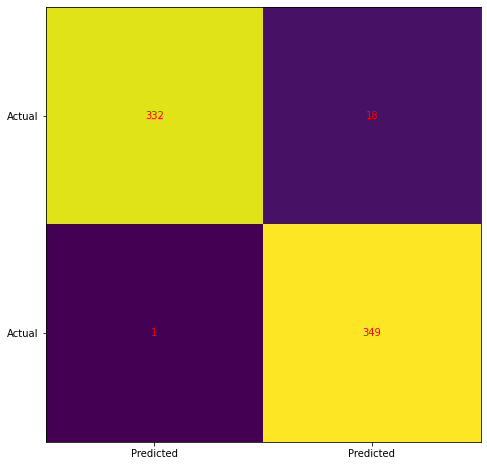

In [137]:
cm = confusion_matrix(y_test, predicted)                # Confusion Matrix 

fig, ax = plt.subplots(figsize=(8, 8))                  # แสดงภาพ Confusion Matrix หลังจาก Predict     
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted', 'Predicted'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual', 'Actual'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [138]:
# โหลดข้อมูลที่โมเดลยังไม่เคยเจอ มาเก็บไว้ในตัวแปร url_test

url_test = 'https://raw.githubusercontent.com/BU-MLearning/Summer/master/unlabeled_data.csv'
test_data = pd.read_csv(url_test)                                               

In [139]:
test = model.predict(test_data)             # ทดลอง Predict ด้วย Model ทีมี Accuracy 97%
#test                                       # แสดง Target ที่ Model ได้ทำนายกับข้อมูลที่ไม่เคยเจอ

In [140]:
df_test = pd.DataFrame(test)                # นำข้อมูลหลังจาก Predict มาเก็บไว้ในรูปแบบ DataFrame
df_test.columns = ['Label']                 # กำหนดชื่อ Column คือ Label

lb_make = LabelEncoder()                    # Encoder Label 
df_test['Label'] = lb_make.fit_transform(df_test["Label"])  # ทำการ Encoder

In [141]:
print(test)                                 # แสดงข้อมูลก่อน Encode
print(df_test)                              # แสดงข้อมูลหลังจาก Encode

['abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'normal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnorma